# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [1]:
candidateno=277239 #this MUST be updated to your candidate number so that you get a unique data sample

In [2]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [4]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['studio', 'expectations', 'must', 'not', 'have', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [5]:
from nltk.corpus import stopwords 
stop = stopwords.words('english')

def normalize(alist): 
    
    lower=[([x.lower() for x in word],pos) for word,pos in alist]   #Lower casing the alist
    norm= [([x for x in word if x.isalpha() and x not in stop and x not in 'NUM'],pos) for word,pos in lower]  #Removing the stop words like 'i','me','my','myself', etc
    
    return norm

In [6]:
from nltk.probability import FreqDist
training_norm = [(FreqDist(i),j) for i,j in normalize(training_data)]  #Taking the frequency distribution i.e. the number of times each word has occurred in the document

testing_norm = [(FreqDist(i),j) for i,j in normalize(testing_data)]

In [7]:
pos_freq_dist=FreqDist()
neg_freq_dist=FreqDist()

for reviewDist,label in training_norm:   #Dividing the dataset into positive and negative
    if label=='pos':
        pos_freq_dist+=reviewDist
    else:
        neg_freq_dist+=reviewDist

In [8]:
pos_freq_dist

FreqDist({'film': 3578, 'one': 2079, 'movie': 1767, 'like': 1266, 'story': 896, 'time': 871, 'good': 867, 'also': 839, 'even': 799, 'well': 792, ...})

In [9]:
neg_freq_dist

FreqDist({'film': 3046, 'movie': 2363, 'one': 2027, 'like': 1356, 'even': 986, 'time': 851, 'good': 833, 'would': 784, 'bad': 748, 'get': 736, ...})

In [10]:
def frequent_words(freq1,freq2,k):     # A function to get most common words based on the freqency distribution 
    diff=freq1-freq2
    mostcommon=diff.most_common()
    words=[i for i,j in mostcommon[:k]]
    
    return words

## <b> Q 1.a)<b>

In [11]:
Top_pos_cwords = frequent_words(pos_freq_dist,neg_freq_dist,10) #Getting top 10 most frequent positive words

print("A list of 10 content words which are representative of the positive reviews in my training data are:\n",Top_pos_cwords,"\nand it's length is:",len(Top_pos_cwords) )

A list of 10 content words which are representative of the positive reviews in my training data are:
 ['film', 'life', 'also', 'story', 'well', 'great', 'best', 'jackie', 'world', 'films'] 
and it's length is: 10


## <b> Q 1.b)<b>

In [12]:
Top_neg_cwords = frequent_words(neg_freq_dist,pos_freq_dist,10) #Getting top 10 most frequent negative words

print("A list of 10 content words which are representative of the negative reviews in my training data are:\n",Top_neg_cwords,"\nand it's length is: ",len(Top_neg_cwords) )

A list of 10 content words which are representative of the negative reviews in my training data are:
 ['movie', 'bad', 'plot', 'even', 'worst', 'could', 'nothing', 'script', 'stupid', 'guy'] 
and it's length is:  10


## <b> Q 1.c)<b> Following steps were carried out:
1. Using the `stopwords` from `nltk.corpus`, I normalised the data set, i.e I first lower cased the dataset and then removed the stop words from it
2. using `FreqDist` from `nltk.probability`, I recored the frequnecy distribution i.e. the number of times each word has occurred in the document of the normalised `training_data` into `training_norm`.
3. I recorded all the postive words from positive/(`pos` labelled) normalised training dataset to `pos_freq_dist` and all the neagtive/(`neg`labelled) normalised training dataset to `neg_freq_dist` from all the documents
4. I wrote a function `frequent_words` which gets the top positive and negative words, i.e by subtracting `neg_freq_dist` from `pos_freq_dist` to get a list of 10 content words which are representative of the positive reviews. And by subtracting `pos_freq_dist` from `neg_freq_dist` to get a list of 10 content words which are representative of the negative reviews.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


## <b> Q 2.a)

In [13]:
from nltk.classify.api import ClassifierI   
 
class SimpleClassifier(ClassifierI):      # Using the ClassifierI from 'nltk.classify.api', I made SimpleClassifier class which takes positive and negative words and
                                          # to classify the documents as positive or negative
    def __init__(self, pos, neg): 
        self._pos = pos 
        self._neg = neg 

    def classify(self, words):            # This function classifies the document based on the score. i.e it will increment the score or decrement the score
                                          # based on our positive word list and negative word list repectively. 
        score = 0
        for i in words:
            if i in self._pos:
                score+=1
            elif i in self._neg:
                score-=1
                
        return "neg" if score < 0 else "pos"

    def labels(self): 
        return ("pos", "neg")

In [14]:
docs,goldstandard=zip(*training_norm)

classifier = SimpleClassifier(Top_pos_cwords, Top_neg_cwords)  # Feeding our classifier with positive and negative words
predictions=classifier.classify_many(docs)                     # Classifing our documents and storing it in 'predicition'
print(predictions[:10])                                        #Just to keep it tidy I have added [:10]

['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos']


In [15]:
classifier.classify("This movie was bad".split())              # An example to demonstrate that our classifier is working fine

'neg'

 ## <b> Q 2.b) <b>   
Using ClassifierI from nltk.classify.api library, the `SimpleClassifier` is initialised with a list of 10 positive words, and a list of 10 negative words. 

All the documents are then passed to the `classify_many` method which inturn runs `classify` method for each document. 
    
This method increments the `score` or decrements the `score` based on our positive word list (`Top_pos_cwords`) and negative word list (`Top_neg_cwords`) repectively. 

Based on the this value the document/review is classified as postive or negative.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

## <b> Q 3.a)<b>

In [16]:
class ConfusionMatrix:     # A ConfusionMatrix class which will calculate 'Accuracy', 'Precision', 'Recall', 'F1'
    
    def __init__(self,predictions,goldstandard,classes=("pos","neg")):
    
        (self.c1,self.c2)=classes
        self.TP=0
        self.FP=0
        self.FN=0
        self.TN=0
        for p,g in zip(predictions,goldstandard):
            if g==self.c1:
                if p==self.c1:
                    self.TP+=1
                else:
                    self.FN+=1
        
            elif p==self.c1:
                self.FP+=1
            else:
                self.TN+=1
    
    def accuracy(self):    #Defining Accuracy
        a=0
        N=self.TP+self.FP+self.TN+self.FN
        a=(self.TP+self.TN)/N
        return a       
    
    def precision(self):   #Defining Precision
        p=0
        p=self.TP/(self.TP+self.FP)
        return p
  
    def recall(self):      #Defining Recall
        r=0
        r=self.TP/(self.TP+self.FN)
        return r
  
    def f1(self):          #Defining F1
        f1=0
        P=self.precision()
        R=self.recall()
        f1= (2 * P * R)/(P+R)
        return f1 


In [17]:
# Initialising 'ConfusionMatrix' with prediction (from SimpleClassifier) and the original/actual class values
# we got the predictions from the classifier which I made earliar
# And we are comparing it with the gold standard to calculate Accuracy, precision etc

ConfusionMatrix1=ConfusionMatrix(predictions,goldstandard)   

In [18]:
Accuracy=ConfusionMatrix1.accuracy()
Precision=ConfusionMatrix1.precision()
Recall=ConfusionMatrix1.recall()
F1=ConfusionMatrix1.f1()
print("Accuracy of my SimpleClassifier using Training Dataset =",Accuracy, "or %.2f" % (Accuracy*100),"%")
print("Precision of my SimpleClassifier using Training Dataset =",Precision, "or %.2f" % (Precision*100),"%")
print("Recall of my SimpleClassifier using Training Dataset =",Recall, "or %.2f" % (Recall*100),"%")
print("F1 of my SimpleClassifier using Training Dataset =",F1, "or %.2f" % (F1*100),"%")

Accuracy of my SimpleClassifier using Training Dataset = 0.6707142857142857 or 67.07 %
Precision of my SimpleClassifier using Training Dataset = 0.62058526740666 or 62.06 %
Recall of my SimpleClassifier using Training Dataset = 0.8785714285714286 or 87.86 %
F1 of my SimpleClassifier using Training Dataset = 0.7273802483737434 or 72.74 %


## <b> Q 3.b)<b>

Taking 50 positive and 50 negative documents for testing

In [19]:
bpos_reviews = training_norm[:50]    # Taking 50 positive docs/reviews
bneg_reviews = training_norm[-50:]   # Taking 50 negative docs/reviews

balanced_training_norm=bpos_reviews + bneg_reviews

bpos_freq_dist=FreqDist()
bneg_freq_dist=FreqDist()
for reviewDist,label in balanced_training_norm:
    if label=='pos':
        bpos_freq_dist+=reviewDist
    else:
        bneg_freq_dist+=reviewDist

bTop_pos_cwords = frequent_words(bpos_freq_dist,bneg_freq_dist,10)   # Top 10 positive most frequent words
bTop_neg_cwords = frequent_words(bneg_freq_dist,bpos_freq_dist,10)   # Top 10 negative most frequent words

In [20]:
bdocs,bgoldstandard=zip(*balanced_training_norm)

bclassifier = SimpleClassifier(bTop_pos_cwords, bTop_neg_cwords)     # Feeding our classifier with positive and negative words
bpredictions = bclassifier.classify_many(bdocs)                      # Classifing our documents and storing it in 'bpredicition'

In [21]:
bConfusionMatrix1=ConfusionMatrix(bpredictions,bgoldstandard)

print("Accuracy of balanced dataset is",bConfusionMatrix1.accuracy())
print("TP",bConfusionMatrix1.TP)
print("FP",bConfusionMatrix1.FP)
print("FN",bConfusionMatrix1.FN)
print("TN",bConfusionMatrix1.TN)

Accuracy of balanced dataset is 0.79
TP 44
FP 15
FN 6
TN 35


The accuracy is given by the formula 
\begin{eqnarray*}
A=\frac{TP+TN}{TP+FP+TN+FN}
\end{eqnarray*}


Filling the values in the table below

|        | Predicted  | Class|     |Total|
|--------|------------|------|-----|-----|    
|        |            | +ve  | -ve |     |
| True   | +ve        |TP=44 |FN=6 | 50  |
| Class  | -ve        |FP=15 |TN=35| 50  |
|        | Total      | 59   | 41  | 100 |

\begin{eqnarray*}
A=\frac{TP+TN}{TP+FP+TN+FN}=\frac{44+35}{44+15+6+35} = 0.79
\end{eqnarray*}



Since the dataset is balanced, even if our classifier predicts all the document/review as negative(as shown below)

|        | Predicted  | Class|     |Total|
|--------|------------|------|-----|-----|
|        |            | +ve  | -ve |     |
| True   | +ve        | TP=0 |FN=50| 50  |
| Class  | -ve        | FP=0 |TN=50| 50  |
|        | Total      |  0   | 100 | 100 |

\begin{eqnarray*}
A=\frac{0+50}{0+50+0+50} = 0.5
\end{eqnarray*}

The accuracy woyld be 50 %
Which means that our classifier is only 50% accurate 

What if the dataset is unbalanced and these are outputs of our classifier? (shown below)

|        | Predicted  | Class|     |Total|
|--------|------------|------|-----|-----|    
|        |            | +ve  | -ve |     |
| True   | +ve        | TP=4 |FN=6 | 10  |
| Class  | -ve        | FP=4 |TN=86| 90  |
|        | Total      |  8   | 92  | 100 |

The accuracy would be 90 %, which is great!

But if our classifier predicts all the documnets to be negative then,

|        | Predicted  | Class|     |Total|
|--------|------------|------|-----|-----|    
|        |            | +ve  | -ve |     |
| True   | +ve        | TP=0 |FN=10| 10  |
| Class  | -ve        | FP=0 |TN=90| 90  |
|        | Total      |  0   | 100 | 100 |

\begin{eqnarray*}
A=\frac{0+90}{0+10+0+90} = 0.9
\end{eqnarray*}

Then also the accuracy will be 90% which doesnt make any sense because we are not predicting it correctly but still the accuracy would be 90%

That is why evaluating the classifier in terms of its accuracy is not the right way. We should use precision, recall and F1 to evalute the classifier.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

## <b> Q 4.a)<b>

In [22]:
from nltk.classify.api import ClassifierI
import math

class NBClassifier(ClassifierI):  # Defining the Naive Bayes Classifier
    
    def __init__(self):
        
        pass
    
    def _set_known_vocabulary(self,training_data):
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)
    
    def _set_priors(self,training_data):
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors
        
    def _set_cond_probs(self,training_data):   
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1
        
            conds[label]=classcond
    
        for label, classcond in conds.items():
            for word in self.known:
        
                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond
            
        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}
        
        self.conds=conds
    
    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)
    
    def classify(self,doc):
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)
    
    

## <b> Q 4.b)<b>

In [23]:
docs,goldstandard=zip(*testing_norm)

classifier = SimpleClassifier(Top_pos_cwords, Top_neg_cwords)  # Feeding our classifier with positive and negative words of training dataset
predictions=classifier.classify_many(docs)                     # Classifing our testing dataset documents and storing it in 'predicition'

ConfusionMatrix1=ConfusionMatrix(predictions,goldstandard)  

Accuracy=ConfusionMatrix1.accuracy()
Precision=ConfusionMatrix1.precision()
Recall=ConfusionMatrix1.recall()
F1=ConfusionMatrix1.f1()

print("Accuracy of my Word list classifier =",Accuracy, "or %.2f" % (Accuracy*100),"%")          #Accuracy of word list classifier
print("Precision of my Word list classifier =",Precision, "or %.2f" % (Precision*100),"%")       #Precision of word list classifier
print("Recall of my Word list classifier =",Recall, "or %.2f" % (Recall*100),"%")                #Recall of word list classifier
print("F1 of my Word list classifier =",F1, "or %.2f" % (F1*100),"%")                            #F1 of word list classifier

Accuracy of my Word list classifier = 0.6483333333333333 or 64.83 %
Precision of my Word list classifier = 0.6027713625866051 or 60.28 %
Recall of my Word list classifier = 0.87 or 87.00 %
F1 of my Word list classifier = 0.7121418826739427 or 71.21 %


In [24]:
nb_classifier=NBClassifier()
nb_classifier.train(training_norm)    # Training our classifier with training dataset 

docs,goldstandard=zip(*testing_norm) 

NB_ConfusionMatrix1=ConfusionMatrix(nb_classifier.classify_many(docs),goldstandard,classes=('pos','neg'))

NB_Accuracy=NB_ConfusionMatrix1.accuracy()
NB_Precision=NB_ConfusionMatrix1.precision()
NB_Recall=NB_ConfusionMatrix1.recall()
NB_F1=NB_ConfusionMatrix1.f1()

print("Accuracy of Naive Bayes classifier=",NB_Accuracy, "or %.2f" % (NB_Accuracy*100),"%")      #Accuracy of Naive bayes classifier
print("Precision of Naive Bayes classifier=",NB_Precision, "or %.2f" % (NB_Precision*100),"%")   #Precision of Naive bayes classifier
print("Recall of Naive Bayes classifier=",NB_Recall, "or %.2f" % (NB_Recall*100),"%")            #Recall of Naive bayes classifier
print("F1 of Naive Bayes classifier=",NB_F1, "or %.2f" % (NB_F1*100),"%")                        #F1 of Naive bayes classifier

Accuracy of Naive Bayes classifier= 0.83 or 83.00 %
Precision of Naive Bayes classifier= 0.8561151079136691 or 85.61 %
Recall of Naive Bayes classifier= 0.7933333333333333 or 79.33 %
F1 of Naive Bayes classifier= 0.8235294117647058 or 82.35 %


As we can clearly see, the Accuracy,Precision and F1 of Naive Bayes classifier is better than my word list classifier. 
Though the recall is higher in case of my word classifier but F1 which considers both precision and recall is higher for Naive Bayes Calssifier

Final Verdict: Naive Bayes Calssifier is better than my word list classifier


5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


## <b> Q 5.a)<b>

Lets do the experiment on `testing_data` to evaluate my word classifier

In [25]:
testresults={}
wordlengths=[5,10,50,100,200,400,600,700]
for runtest in range(4):           # Running the test 4 times
    results={}
    for wordLen in wordlengths:    # The max we can take is 700, since we have only 700 positive and 700 negative documents.
        training_data2,testing_data2=get_train_test_data()
        training_norm2 = [(FreqDist(i),j) for i,j in normalize(training_data2)]   
        testing_norm2 = [(FreqDist(i),j) for i,j in normalize(testing_data2)]  
        
        pos_freq_dist2=FreqDist()
        neg_freq_dist2=FreqDist()
        for reviewDist,label in training_norm2:
            if label=='pos':
                pos_freq_dist2+=reviewDist
            else:
                neg_freq_dist2+=reviewDist

        Top_pos_cwords2 = frequent_words(pos_freq_dist2,neg_freq_dist2,wordLen)
        Top_neg_cwords2 = frequent_words(neg_freq_dist2,pos_freq_dist2,wordLen)

        docs2,goldstandard2=zip(*testing_norm2)   #Testing dataset

        movie_classifier2 = SimpleClassifier(Top_pos_cwords2,Top_neg_cwords2)
        predictions2=movie_classifier2.classify_many(docs2)

        ConfusionMatrix3=ConfusionMatrix(predictions2,goldstandard2)
        Accuracy=ConfusionMatrix3.accuracy()
        Precision=ConfusionMatrix3.precision()
        Recall=ConfusionMatrix3.recall()
        F1=ConfusionMatrix3.f1()
        #print("Precision=",Precision)
        #print("Accuracy=",Accuracy)
        
        results[wordLen]=results.get(wordLen,0)+Accuracy,Precision,Recall,F1
    testresults[runtest]=results

In [26]:
df=pd.DataFrame(testresults) 
df=df.transpose()

avg_values={}
for size in wordlengths: 
    avg_values[size]=[(i+j+k+l)/4 for i,j,k,l in zip(*df[size])]

df_avg=pd.DataFrame(avg_values) 
df_avg=df_avg.transpose()
df_avg.rename(columns={0: "Accuracy", 1: "Precision", 2: "Recall", 3: "F1"},inplace=True)
df_avg

,Accuracy,Precision,Recall,F1
5,0.615833,0.578895,0.889167,0.697848
10,0.640000,0.590474,0.918333,0.718619
50,0.572917,0.540126,0.984167,0.697427
100,0.627500,0.576612,0.970833,0.723071
200,0.662500,0.602087,0.962500,0.740559
400,0.630000,0.577805,0.983333,0.727281
600,0.624583,0.573212,0.987500,0.725047
700,0.623750,0.573765,0.983333,0.724053


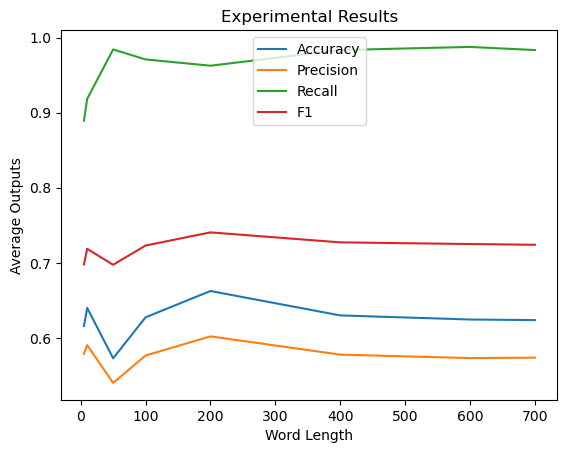

In [27]:
ax = df_avg.plot(kind="line",title="Experimental Results")
ax.set_ylabel("Average Outputs")
ax.set_xlabel("Word Length")
ax.legend(loc="best")

After running multiple tests,it has been observed that:

Recall, which is the proportion of actually +ve documents that are predicted correctly was maximum when the length was 50 i.e 0.984167.

But, we want high F1 which is  score to evaluate the Classifier.
The classifier (F1 score which considers both precision and recall) is performing well when the length of word list is 200, F1-score = 0.740559.


## <b> Q 5.b)<b>

In [28]:
nb_classifier=NBClassifier()
nb_classifier.train(training_norm)

docs,goldstandard=zip(*testing_norm) 

NB_ConfusionMatrix1=ConfusionMatrix(nb_classifier.classify_many(docs),goldstandard,classes=('pos','neg'))

NB_Accuracy=NB_ConfusionMatrix1.accuracy()
NB_Precision=NB_ConfusionMatrix1.precision()
NB_Recall=NB_ConfusionMatrix1.recall()
NB_F1=NB_ConfusionMatrix1.f1()

print("Accuracy of Naive Bayes classifier =",NB_Accuracy, "or %.2f" % (NB_Accuracy*100),"%")      #Accuracy of Naive bayes classifier
print("Precision of Naive Bayes classifier =",NB_Precision, "or %.2f" % (NB_Precision*100),"%")   #Precision of Naive bayes classifier
print("Recall of Naive Bayes classifier =",NB_Recall, "or %.2f" % (NB_Recall*100),"%")            #Recall of Naive bayes classifier
print("F1 of Naive Bayes classifier =",NB_F1, "or %.2f" % (NB_F1*100),"%")                        #F1 of Naive bayes classifier

Accuracy of Naive Bayes classifier = 0.83 or 83.00 %
Precision of Naive Bayes classifier = 0.8561151079136691 or 85.61 %
Recall of Naive Bayes classifier = 0.7933333333333333 or 79.33 %
F1 of Naive Bayes classifier = 0.8235294117647058 or 82.35 %


In [29]:
df_avg.idxmax() + df_avg.max()     # Emperimental results

Accuracy     200.662500
Precision    200.602087
Recall       600.987500
F1           200.740559
dtype: float64

Comparing the results of the experiment with the Naive Bayes classifier:

The Recall is higher for my word classifier, I can use it if I want to minimize false negatives.

The accuracy, precision, and F1 Score of Naive Bayes classifier is better than my word classifier.

Final Verdict: F1 score is the best way to evalualte the classifier, so based on that, Naive Bayes classifier is better than my word classifier

I would defintely use Naive Bayes classifier for all of my future work

.

In [30]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

#from google.colab import drive
#drive.mount('/content/drive')

#filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
filepath="C:/Users/Sai/OneDrive - University of Sussex/Python/NLP/Assignment-1/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1014


C:\Users\Sai\AppData\Local\Temp\ipykernel_3180\1312045695.py:4: DeprecationWarning: nbformat.current is deprecated since before nbformat 3.0

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  from nbformat import current
